In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!wget https://www.dropbox.com/scl/fi/9vyv9p61y6b9rm67eva57/archive.zip?rlkey=ilbqep1uckq9eooobr9069oe6&st=4e8p3m7h&dl=0

--2024-06-22 00:27:50--  https://www.dropbox.com/scl/fi/9vyv9p61y6b9rm67eva57/archive.zip?rlkey=ilbqep1uckq9eooobr9069oe6
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7c7207a1e244e38c7d3eacdca7.dl.dropboxusercontent.com/cd/0/inline/CVQuJGdQOhOxtO4uxrP8nhoBHVGCWD0-vzTLpko9j9BuWTbhTjXItXwlMvxiih1VR1-KIMEHJJNryTyQMgil2FfACqxp2nEQ0zU4qYmNbyr1ggOmbKnoCYFV5h5XhblNj_CSMBCatWZmwTZlY0vFhUK1/file# [following]
--2024-06-22 00:27:50--  https://uc7c7207a1e244e38c7d3eacdca7.dl.dropboxusercontent.com/cd/0/inline/CVQuJGdQOhOxtO4uxrP8nhoBHVGCWD0-vzTLpko9j9BuWTbhTjXItXwlMvxiih1VR1-KIMEHJJNryTyQMgil2FfACqxp2nEQ0zU4qYmNbyr1ggOmbKnoCYFV5h5XhblNj_CSMBCatWZmwTZlY0vFhUK1/file
Resolving uc7c7207a1e244e38c7d3eacdca7.dl.dropboxusercontent.com (uc7c7207a1e244e38c7d3eacdca7.dl.dropboxusercontent.com)... 162.125.1.15, 2620:1

In [3]:
!unzip /content/archive.zip?rlkey=ilbqep1uckq9eooobr9069oe6

Archive:  /content/archive.zip?rlkey=ilbqep1uckq9eooobr9069oe6
replace brain_tumor_dataset/no/1 no.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [5]:
ROOT_DIR = "/content/brain_tumor_dataset"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))


number_of_images.items()

dict_items([('no', 98), ('yes', 155)])

In [6]:
def dataFolder(p, split):
  if not os.path.exists("./"+p):
    os.mkdir("./"+p)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+p+ "/"+ dir)

      for img in np.random.choice( a = os.listdir(os.path.join(ROOT_DIR, dir)),
                         size = (math.floor(split*number_of_images[dir])-3),
                             replace = False):
       O = os.path.join(ROOT_DIR, dir, img)
       D = os.path.join("./"+p, dir)
       shutil.copy(O,D)
       os.remove(O)
  else:
    print(f"{p}Folder exists")

In [7]:
dataFolder("train", 0.7)

trainFolder exists


In [8]:
dataFolder( "val", 0.15)

valFolder exists


In [9]:
dataFolder( "test", 0.15)

testFolder exists


In [10]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import MobileNet, preprocess_input

In [11]:
def preprocessingImages1(path):
  image_data = ImageDataGenerator(preprocessing_function=preprocess_input,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True)
  image = image_data.flow_from_directory(directory = path,
                               target_size = (224,224),
                               batch_size = 32,
                               class_mode = "binary")
  return image

In [12]:
path = "/content/train"
train_data = preprocessingImages1(path)

Found 170 images belonging to 2 classes.


In [13]:
train_data.class_indices

{'no': 0, 'yes': 1}

In [14]:
def preprocessingImages2(path):
  image_data = ImageDataGenerator(preprocessing_function=preprocess_input)
  image = image_data.flow_from_directory(directory = path,
                               target_size = (224,224),
                               batch_size = 32,
                               class_mode = "binary")
  return image

In [15]:
path = "/content/test"
test_data = preprocessingImages2(path)

Found 31 images belonging to 2 classes.


In [16]:
path = "/content/val"
val_data = preprocessingImages2(path)

Found 31 images belonging to 2 classes.


Model Training

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet
import keras


In [18]:
base_model = MobileNet(input_shape = (224,224,3), include_top = False)

In [19]:
for layer in base_model.layers:
  layer.trainable = False

In [20]:
X = Flatten()(base_model.output)
X = Dense(units = 1, activation = "sigmoid")(X)

model = Model(base_model.input, X)

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [22]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [23]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

mc = ModelCheckpoint(filepath = "best_model.h5", monitor = "val_accuracy", verbose =1, save_best_only = True)
es = EarlyStopping(monitor = "val_accuracy", min_delta = 0.01, patience = 3, verbose = 1)

cb = [mc, es]

In [41]:
hist = model.fit_generator(train_data,
                    steps_per_epoch = 6,
                    epochs = 30,
                    validation_data = val_data,
                    validation_steps = 16,
                    callbacks = cb)

Epoch 1/30
6/6 [==============================] - ETA: 0s - loss: 1.0896 - accuracy: 0.8412


Epoch 1: val_accuracy did not improve from 0.87097
6/6 [==============================] - 4s 464ms/step - loss: 1.0896 - accuracy: 0.8412 - val_loss: 1.5833 - val_accuracy: 0.8387
Epoch 2/30
6/6 [==============================] - ETA: 0s - loss: 0.3994 - accuracy: 0.9118

6/6 [==============================] - 2s 419ms/step - loss: 0.3994 - accuracy: 0.9118
Epoch 3/30
6/6 [==============================] - ETA: 0s - loss: 0.4774 - accuracy: 0.9000

6/6 [==============================] - 3s 373ms/step - loss: 0.4774 - accuracy: 0.9000
Epoch 4/30
6/6 [==============================] - ETA: 0s - loss: 0.3378 - accuracy: 0.9412

6/6 [==============================] - 3s 487ms/step - loss: 0.3378 - accuracy: 0.9412
Epoch 5/30
6/6 [==============================] - ETA: 0s - loss: 0.3127 - accuracy: 0.9353

6/6 [==============================] - 2s 352ms/step - loss: 0.3127 - accuracy: 0.9353
Epoch 6/30
6/6 [==============================] - ETA: 0s - loss: 0.3198 - accuracy: 0.9471

6/6 [==============================] - 2s 310ms/step - loss: 0.3198 - accuracy: 0.9471
Epoch 7/30
6/6 [==============================] - ETA: 0s - loss: 0.0650 - accuracy: 0.9765

6/6 [==============================] - 2s 319ms/step - loss: 0.0650 - accuracy: 0.9765
Epoch 8/30
6/6 [==============================] - ETA: 0s - loss: 0.0625 - accuracy: 0.9824

6/6 [==============================] - 2s 319ms/step - loss: 0.0625 - accuracy: 0.9824
Epoch 9/30
6/6 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000

6/6 [==============================] - 2s 314ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 10/30
6/6 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000

6/6 [==============================] - 3s 498ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 11/30
6/6 [==============================] - ETA: 0s - loss: 0.0453 - accuracy: 0.9882

6/6 [==============================] - 2s 313ms/step - loss: 0.0453 - accuracy: 0.9882
Epoch 12/30
6/6 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9941

6/6 [==============================] - 2s 313ms/step - loss: 0.0444 - accuracy: 0.9941
Epoch 13/30
6/6 [==============================] - ETA: 0s - loss: 0.0051 - accuracy: 1.0000

6/6 [==============================] - 2s 316ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 14/30
6/6 [==============================] - ETA: 0s - loss: 0.0293 - accuracy: 0.9941

6/6 [==============================] - 2s 317ms/step - loss: 0.0293 - accuracy: 0.9941
Epoch 15/30
6/6 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 1.0000

6/6 [==============================] - 2s 472ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 16/30
6/6 [==============================] - ETA: 0s - loss: 0.0202 - accuracy: 0.9941

6/6 [==============================] - 3s 369ms/step - loss: 0.0202 - accuracy: 0.9941
Epoch 17/30
6/6 [==============================] - ETA: 0s - loss: 4.9984e-04 - accuracy: 1.0000

6/6 [==============================] - 2s 377ms/step - loss: 4.9984e-04 - accuracy: 1.0000
Epoch 18/30
6/6 [==============================] - ETA: 0s - loss: 0.0074 - accuracy: 0.9941    

6/6 [==============================] - 2s 357ms/step - loss: 0.0074 - accuracy: 0.9941
Epoch 19/30
6/6 [==============================] - ETA: 0s - loss: 0.0320 - accuracy: 0.9941

6/6 [==============================] - 2s 362ms/step - loss: 0.0320 - accuracy: 0.9941
Epoch 20/30
6/6 [==============================] - ETA: 0s - loss: 5.0376e-04 - accuracy: 1.0000

6/6 [==============================] - 2s 429ms/step - loss: 5.0376e-04 - accuracy: 1.0000
Epoch 21/30
6/6 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000

6/6 [==============================] - 3s 416ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 22/30
6/6 [==============================] - ETA: 0s - loss: 0.0171 - accuracy: 0.9941

6/6 [==============================] - 2s 317ms/step - loss: 0.0171 - accuracy: 0.9941
Epoch 23/30
6/6 [==============================] - ETA: 0s - loss: 0.0052 - accuracy: 0.9941

6/6 [==============================] - 2s 317ms/step - loss: 0.0052 - accuracy: 0.9941
Epoch 24/30
6/6 [==============================] - ETA: 0s - loss: 7.0618e-04 - accuracy: 1.0000

6/6 [==============================] - 2s 322ms/step - loss: 7.0618e-04 - accuracy: 1.0000
Epoch 25/30
6/6 [==============================] - ETA: 0s - loss: 0.0176 - accuracy: 0.9941

6/6 [==============================] - 2s 319ms/step - loss: 0.0176 - accuracy: 0.9941
Epoch 26/30
6/6 [==============================] - ETA: 0s - loss: 4.5048e-04 - accuracy: 1.0000

6/6 [==============================] - 3s 418ms/step - loss: 4.5048e-04 - accuracy: 1.0000
Epoch 27/30
6/6 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000

6/6 [==============================] - 2s 372ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 28/30
6/6 [==============================] - ETA: 0s - loss: 0.0024 - accuracy: 1.0000

6/6 [==============================] - 2s 377ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 29/30
6/6 [==============================] - ETA: 0s - loss: 2.4710e-04 - accuracy: 1.0000

6/6 [==============================] - 2s 373ms/step - loss: 2.4710e-04 - accuracy: 1.0000
Epoch 30/30
6/6 [==============================] - ETA: 0s - loss: 8.6540e-05 - accuracy: 1.0000

6/6 [==============================] - 2s 449ms/step - loss: 8.6540e-05 - accuracy: 1.0000


In [42]:
acc = model.evaluate_generator(test_data)[1]
print(f"Test Accuracy : {acc*100}")

Test Accuracy : 96.77419066429138


In [43]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

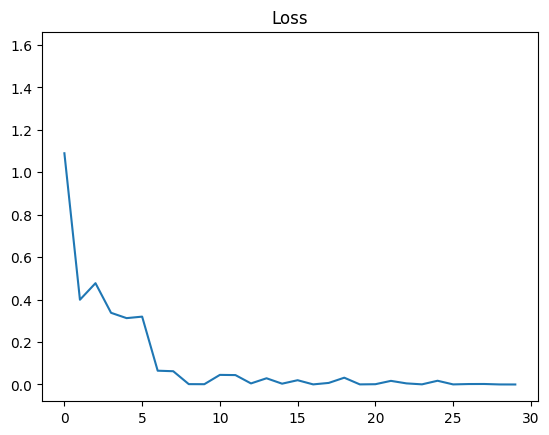

In [44]:
plt.plot(h["loss"])
plt.plot(h["val_loss"], c = "red")
plt.title("Loss")
plt.show()

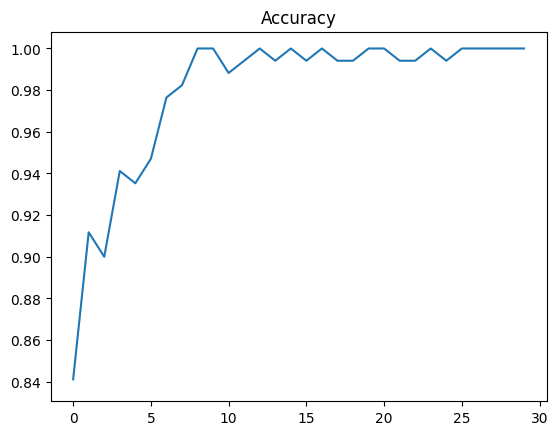

In [45]:
plt.plot(h["accuracy"])
plt.plot(h["val_accuracy"], c = "red")
plt.title("Accuracy")
plt.show()

In [30]:
from keras.preprocessing.image import load_img, img_to_array

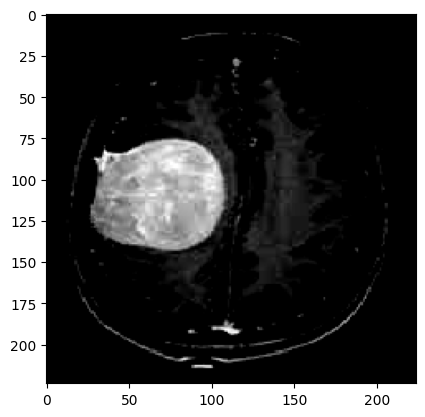

1/1 [==============================] - 0s 83ms/step
Yes Tumor


In [47]:

# Load and preprocess the image
path = "/content/brain_tumor_dataset/yes/Y1.jpg"
img = load_img(path, target_size=(224,224))

input_arr = img_to_array(img)
input_arr = preprocess_input(input_arr)

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis=0)  # Add batch dimension

# Predict the class
pred = model.predict(input_arr)[0][0]  # Get probabilities
pred
# Get the predicted class index
#pred = np.argmax(pred, axis=0)[0]  # Get class index
#pred

if pred >= 0.5:
    print("Yes Tumor")
else:
    print("No Tumor")
